# OpenCV - Getting Started

Source:
- https://docs.opencv.org/master/da/df6/tutorial_py_table_of_contents_setup.html
- https://docs.opencv.org/master/dc/d4d/tutorial_py_table_of_contents_gui.html
- https://docs.opencv.org/master/d7/d16/tutorial_py_table_of_contents_core.html

In [1]:
import cv2 as cv
import numpy as np
import sys

# Images

### Load image

In [6]:
img = cv.imread("test.jpg")
img_grayscale = cv.imread("test.jpg", cv.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError

### Display in external window

In [7]:
cv.imshow("Window", img)
_ = cv.waitKeyEx()

### Display in notebook

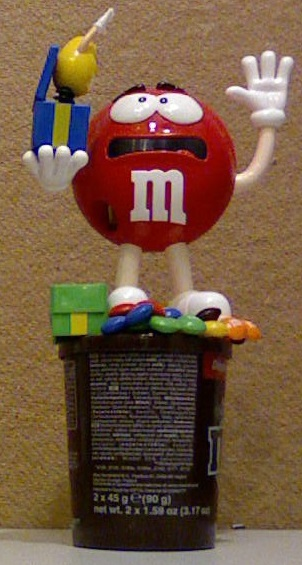

In [38]:
from PIL import Image
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
Image.fromarray(img_rgb)

### Save image

In [40]:
cv.imwrite("saved_bgr.png", img_rgb)
cv.imwrite("saved_rgb.png", img)

True

# Videos

### Capturing video

In [26]:
camera = cv.VideoCapture(0)

if not camera.isOpened():
    raise Exception("Camera not found.")

while True:
    ret, frame = camera.read()
    
    if not ret:
        camera.release()
        writer.release()
        cv.destroyAllWindows()
        raise Exception("Can't recieve frame.")
    
    frame = cv.rotate(frame, cv.ROTATE_90_COUNTERCLOCKWISE)

    cv.imshow("Window", frame)
    if cv.waitKey(1) == ord('q'):
        break

camera.release()
cv.destroyAllWindows()

### Saving video

In [38]:
camera = cv.VideoCapture(0)
fourcc = cv.VideoWriter_fourcc(*'DIVX')
writer = cv.VideoWriter("saved.avi", fourcc, 30, (480, 640))

if not camera.isOpened():
    raise Exception("Camera not found.")

while True:
    ret, frame = camera.read()

    if not ret:
        camera.release()
        writer.release()
        cv.destroyAllWindows()
        raise Exception("Can't recieve frame.")

    frame = cv.rotate(frame, cv.ROTATE_90_COUNTERCLOCKWISE)

    writer.write(frame)

    cv.imshow("Window", frame)
    if cv.waitKey(1) == ord("q"):
        break
    
camera.release()
writer.release()
cv.destroyAllWindows()

### Loading video

In [2]:
camera = cv.VideoCapture("saved_10.avi")

if not camera.isOpened():
    raise Exception("Camera not found.")

while True:
    ret, frame = camera.read()

    if not ret:
        break

    cv.imshow("Window", frame)
    if cv.waitKey(1000 // 30) == ord("q"):
        break

camera.release()
cv.destroyAllWindows()

# Drawing 

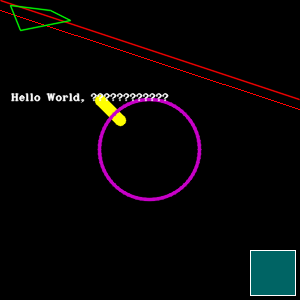

In [62]:
img = np.zeros((300, 300, 3), np.uint8)

cv.line(img, (0,0), (299, 99), (0, 0, 255), thickness=1, lineType=cv.LINE_AA)
cv.line(img, (0,10), (299, 109), (0, 0, 255), thickness=1)
cv.line(img, (100, 100), (120, 120), (0, 255, 255), thickness=10, lineType=cv.LINE_AA)

cv.rectangle(img, (250, 250), (295, 295), (100, 100, 0), -1)
cv.rectangle(img, (250, 250), (295, 295), (255, 255, 255), 1)

cv.circle(img, (149, 149), 50, (200, 0, 200), 2, lineType=cv.LINE_AA)

pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv.polylines(img, (pts,), True, (0, 255, 0), 1, cv.LINE_AA)

font = cv.FONT_HERSHEY_COMPLEX_SMALL
cv.putText(img, "Hello World, ąęćźżś", (10, 100), font, 0.5, (255, 255, 255), 1, cv.LINE_AA)

# Display in notebook
from PIL import Image
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display(Image.fromarray(img_rgb))

# Display in window
cv.imshow("Window", img)
_ = cv.waitKey(0)

# Basic Operations on Images

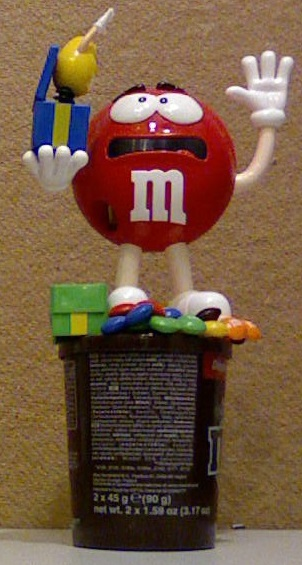

In [85]:
img = cv.imread("test.jpg")

from PIL import Image
def imdisplay(img):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    display(Image.fromarray(img_rgb))

imdisplay(img)

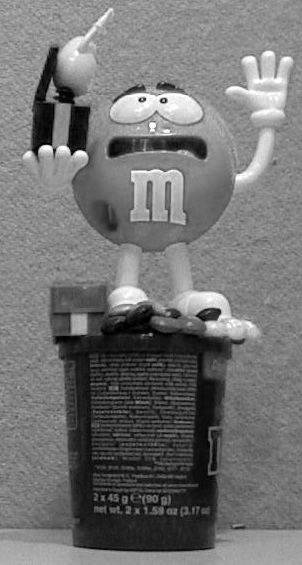

In [86]:
imdisplay(img[:, :, 2])

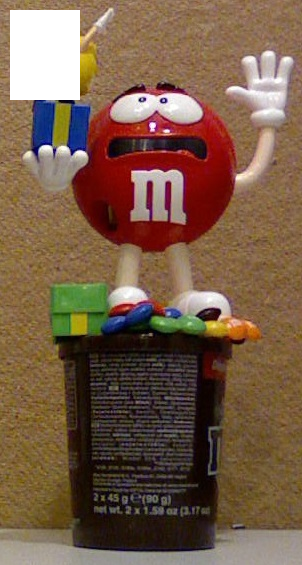

In [87]:
img2 = img.copy()
img2[10:100, 10:80] = (255, 255, 255)
imdisplay(img2)

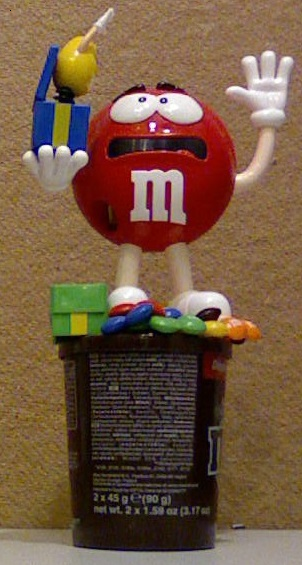

9

In [103]:
img3 = img.copy()
img3.itemset((10, 10, 0), 9)
img3.itemset((10, 10, 1), 9)
img3.itemset((10, 10, 2), 9)
imdisplay(img3)
img3.item(10, 10, 0)

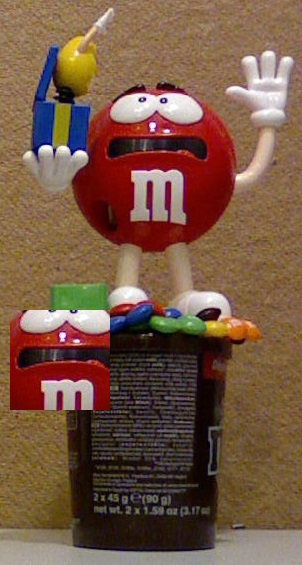

In [116]:
img4 = img.copy()
img4[310:410, 10:110] = img[100:200, 100:200]
imdisplay(img4)

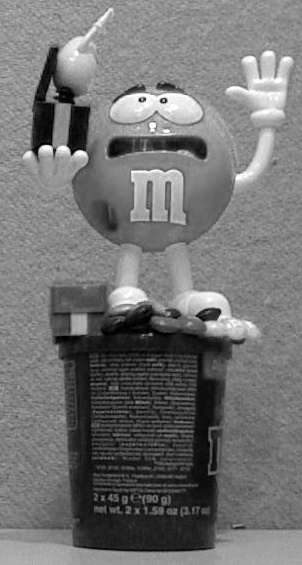

In [132]:
b, g, r = cv.split(img)
imdisplay(r)

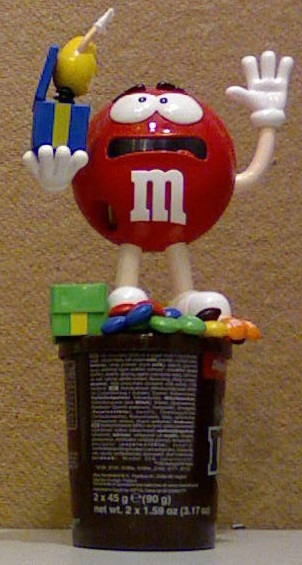

In [129]:
imdisplay(cv.merge((b, g, r)))

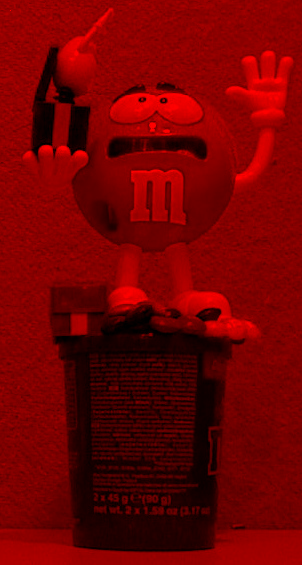

In [131]:
img5 = img.copy()
img5[:, :, 0] = 0
img5[:, :, 1] = 0
imdisplay(img5)

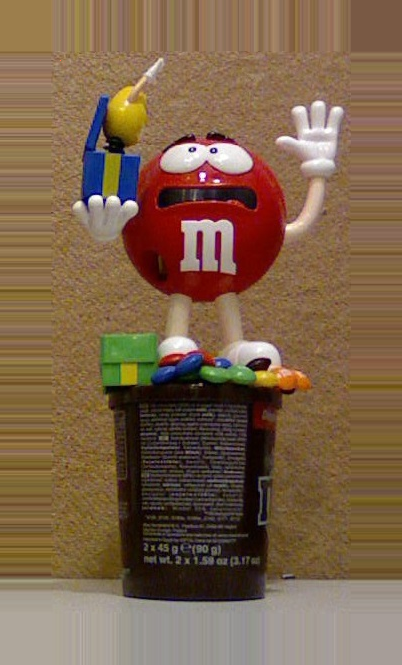

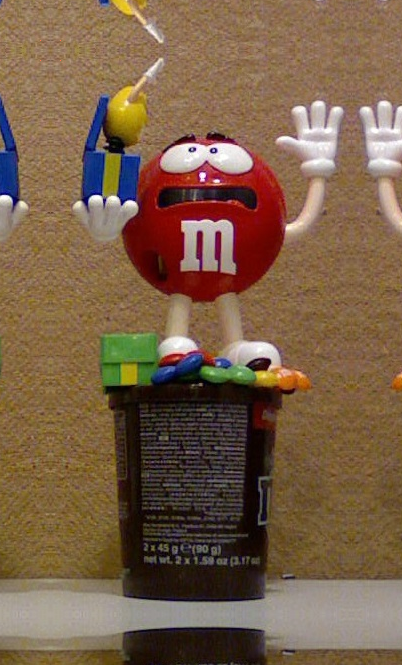

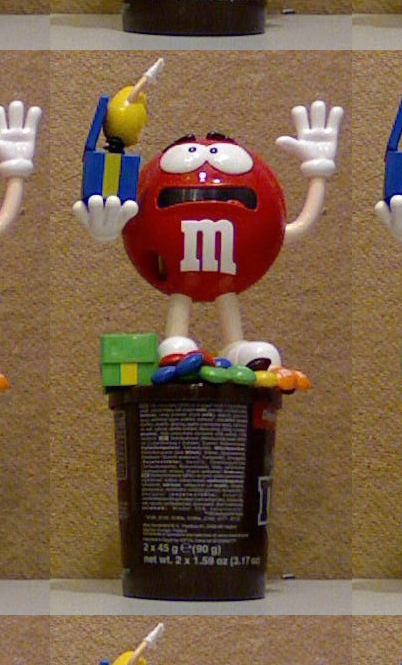

In [138]:
imdisplay(cv.copyMakeBorder(img, 50, 50, 50, 50, cv.BORDER_REPLICATE))
imdisplay(cv.copyMakeBorder(img, 50, 50, 50, 50, cv.BORDER_REFLECT_101))
imdisplay(cv.copyMakeBorder(img, 50, 50, 50, 50, cv.BORDER_WRAP))

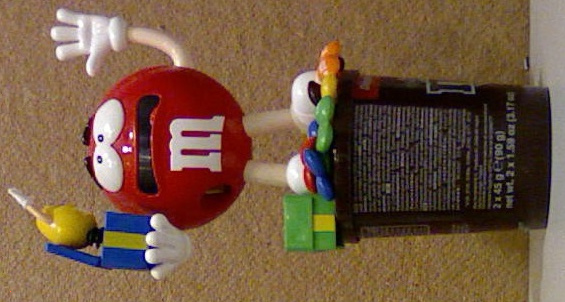

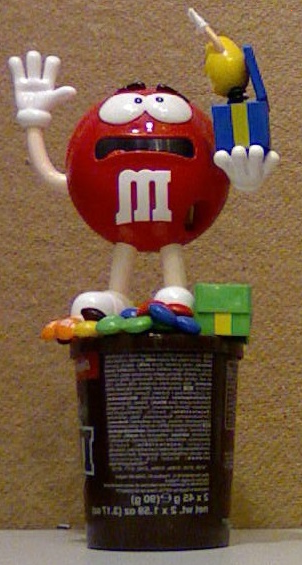

In [142]:
imdisplay(cv.rotate(img, cv.ROTATE_90_COUNTERCLOCKWISE))
imdisplay(cv.flip(img, 1))

# Arithmetic Operations on Images

### Numpy addition

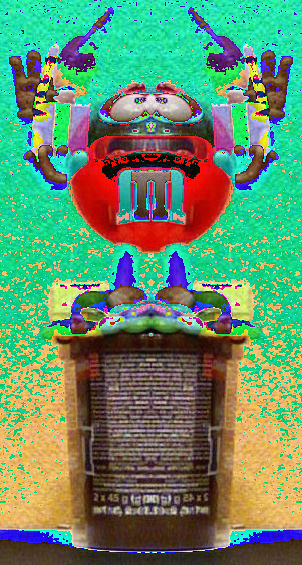

In [147]:
imdisplay(cv.flip(img, 1) + img)

### OpenCV addition

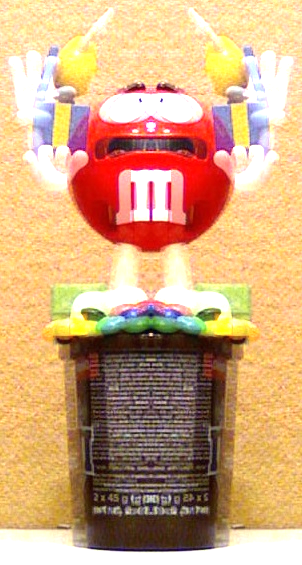

In [149]:
imdisplay(cv.add(cv.flip(img, 1), img))

### Image blending

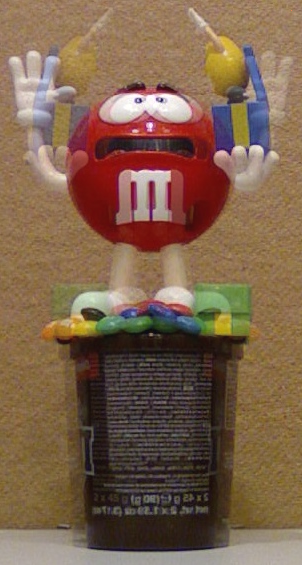

In [157]:
imdisplay(cv.addWeighted(cv.flip(img, 1), 0.7, img, 0.3, 10))

In [165]:
%timeit 10 * 100000

7.13 ns ± 0.265 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


# Optimization

In [166]:
cv.useOptimized()

True

In [167]:
%timeit res = cv.medianBlur(img, 49)

16.6 ms ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [168]:
x = 10
z = np.uint8([5])

%timeit y=x**2
%timeit y=x*x
%timeit y=z*z
%timeit y=np.square(z)

314 ns ± 0.649 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
72.9 ns ± 0.236 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
607 ns ± 2.84 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
622 ns ± 2.78 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%time 

In [19]:
%%timeit
for i in range(100000): y = 100*10

2.25 ms ± 36.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# More operations on images

In [19]:
img = cv.imread("test.jpg")

from PIL import Image
def imdisplay(img):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    display(Image.fromarray(img_rgb))

### Gaussian Blur

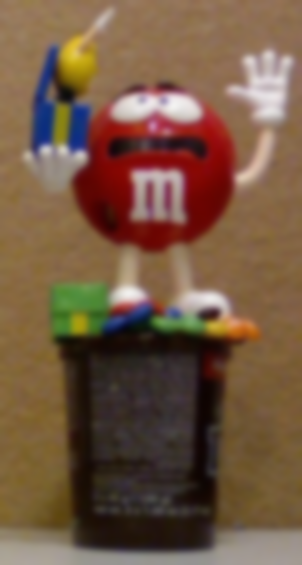

In [18]:
img_blur = cv.GaussianBlur(img.copy(), (19, 19), 0)
imdisplay(img_blur)

### Edge detection

0 0


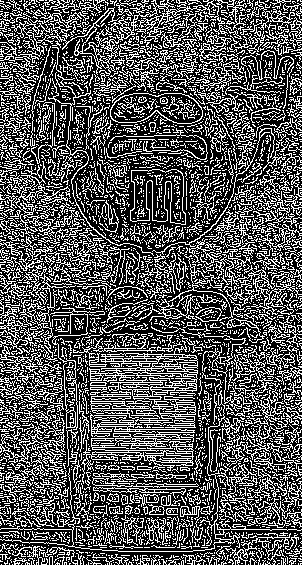

0 100


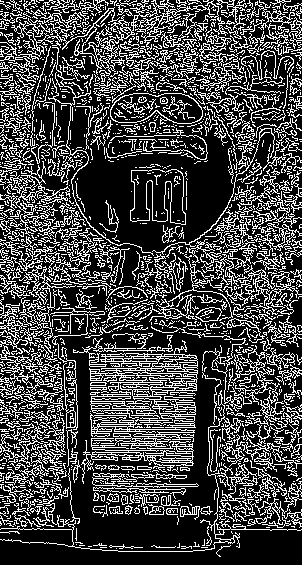

0 200


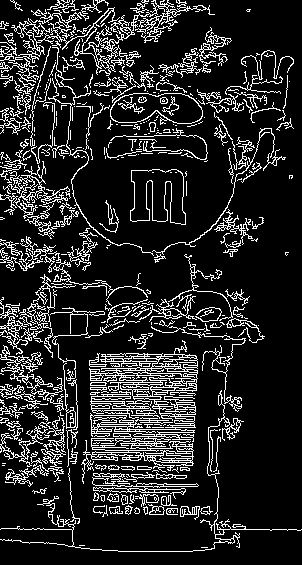

0 300


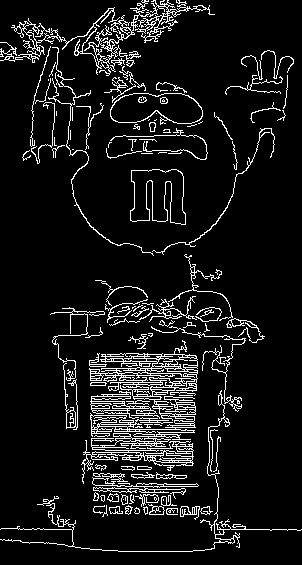

100 100


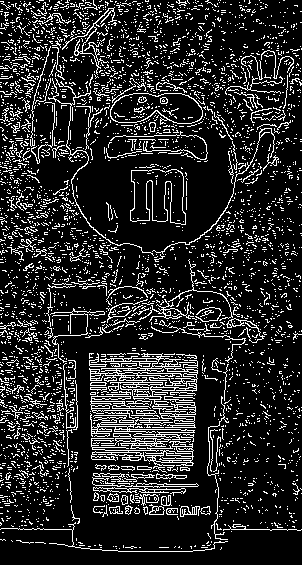

100 200


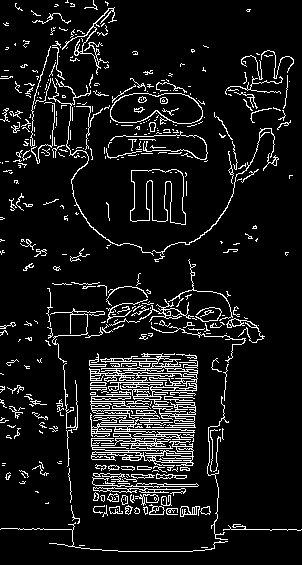

100 300


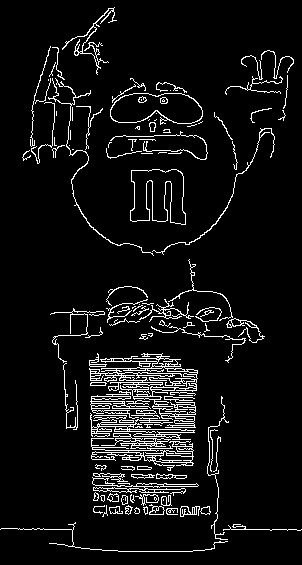

200 200


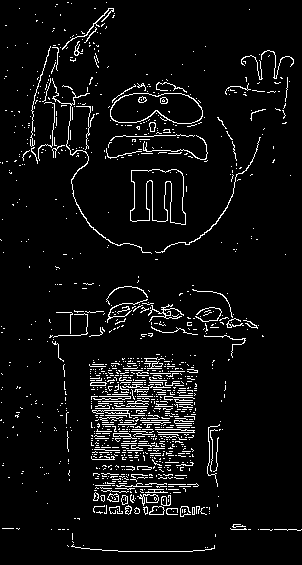

200 300


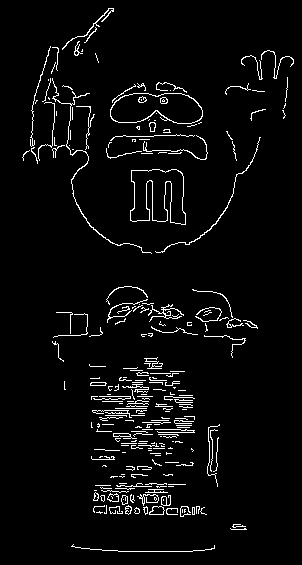

300 300


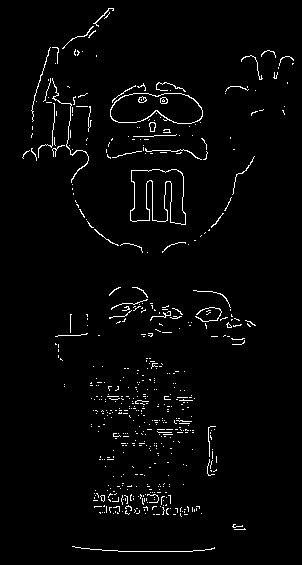

In [25]:
for i in range(0, 301, 100):
    for j in range(i, 301, 100):
        print(i, j)
        img_canny = cv.Canny(img.copy(), i, j)
        imdisplay(img_canny)

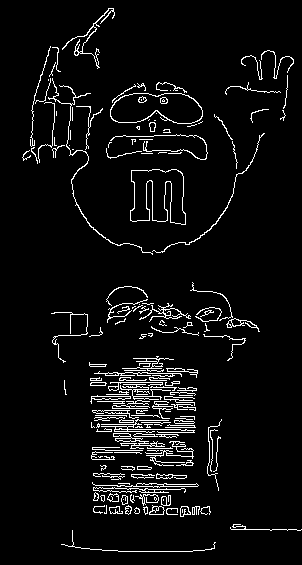

In [34]:
img_canny = cv.Canny(img.copy(), 150, 300)
imdisplay(img_canny)

### Dialation

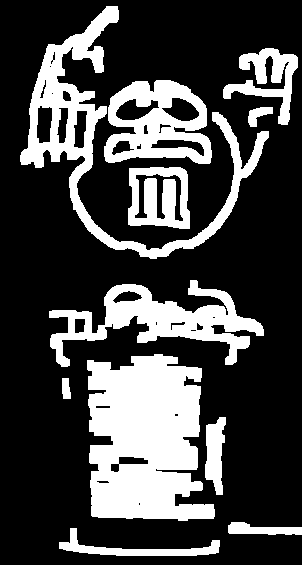

In [49]:
kernel = np.ones((4, 4), dtype=np.uint8)
img_dialation = cv.dilate(img_canny, kernel, iterations=2)
imdisplay(img_dialation)

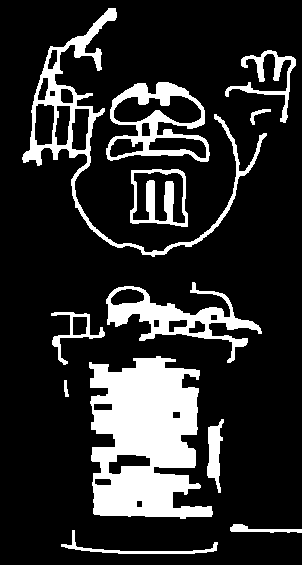

In [53]:
kernel = np.ones((5, 5), dtype=np.uint8)
img_erosion = cv.erode(img_dialation, kernel, iterations=1)
imdisplay(img_erosion)

### Resizing

In [56]:
print(img.shape[:2])

(565, 302)


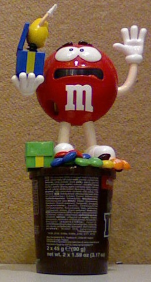

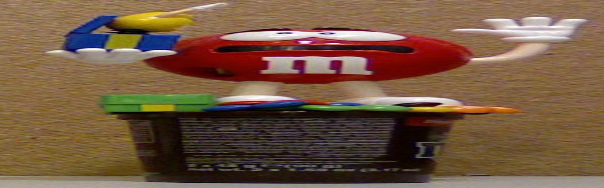

In [62]:
new_size = (img.shape[1] // 2, img.shape[0] // 2)
img_resized = cv.resize(img, new_size)
imdisplay(img_resized)

new_size = (img.shape[1] * 2, img.shape[0] // 3)
img_resized = cv.resize(img, new_size)
imdisplay(img_resized)

### Cropping

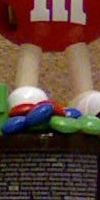

In [67]:
img_cropped = img.copy()
img_cropped = img_cropped[200:400, 100:200]
imdisplay(img_cropped)